# Parkinson's Disease Detection - Project by Mrityunjay Abhijeet Bhanja

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

Dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons#:~:text=This%20dataset%20is%20composed%20of,(%22name%22%20column).

# Independent Variable

ASCII subject name and recording number:
- __name__

Vocal Fundamental Frequency:
- __MDVP:Fo(Hz)__ - Average
- __MDVP:Fhi(Hz)__ - Maximum 
- __MDVP:Flo(Hz)__ - Minimum

Measures of variation in fundamental frequency:
- __MDVP:Jitter(%)__
- __MDVP:Jitter(Abs)__
- __MDVP:RAP__
- __MDVP:PPQ__
- __Jitter:DDP__<br>

Measures of variation in amplitude:
- __MDVP:Shimmer__
- __MDVP:Shimmer(dB)__
- __Shimmer:APQ3__
- __Shimmer:APQ5__
- __MDVP:APQ__ 
- __Shimmer:DDA__


Two measures of ratio of noise to tonal components in the voice:
- __NHR__
- __HNR__


Two nonlinear dynamical complexity measures:
- __RPDE__
- __D2__


Signal fractal scaling exponent:
__DFA__

Three nonlinear measures of fundamental frequency variation:
- __spread1__
- __spread2__
- __PPE__

# Target Variable:
__status__ - Health status of the subject (one) - Parkinson's, (zero) - healthy <br>

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import pandas_profiling

#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data

df = pd.read_csv("Data - Parkinsons")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.shape

(195, 24)

- The dataset has 24 columns and 195 rows.

In [4]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
df.astype({'status': 'category'}).dtypes

name                  object
MDVP:Fo(Hz)          float64
MDVP:Fhi(Hz)         float64
MDVP:Flo(Hz)         float64
MDVP:Jitter(%)       float64
MDVP:Jitter(Abs)     float64
MDVP:RAP             float64
MDVP:PPQ             float64
Jitter:DDP           float64
MDVP:Shimmer         float64
MDVP:Shimmer(dB)     float64
Shimmer:APQ3         float64
Shimmer:APQ5         float64
MDVP:APQ             float64
Shimmer:DDA          float64
NHR                  float64
HNR                  float64
status              category
RPDE                 float64
DFA                  float64
spread1              float64
spread2              float64
D2                   float64
PPE                  float64
dtype: object

- The target variable is "status", which is the indicator if a person has Parkinson's disease or not
- From all the independent variables, name is the only variable of type "object". Rest all are numeric in nature.

In [6]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### There are no missing or null values.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


The mean and median of most of the attributes seem to differ a lot by margin. This will determine the skewness of each column. We will take a look at each of them below.<br>
All the values in spread1 are negative. We will scale them later for better model building.

### Analysing output class

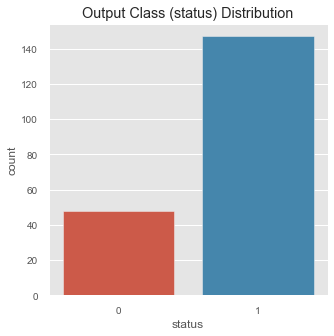

Number of positive cases: 147 (75.38%)
Number of negative cases: 48 (24.62%)


In [9]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.title("Output Class (status) Distribution")
plt.xticks([0,1])
sns.countplot(df["status"]);
plt.show();


n_true = len(df.loc[df["status"] == True])
n_false = len(df.loc[df["status"] == False])
print("Number of positive cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of negative cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

### We've got a __3:1__ ratio of output values

In [10]:
for col in df.columns:
    print(col)

name
MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE


## The attribute "name" is irrelevant to our problem. The recording name will not provide any value to our model. It's only work is to act as a unique ID for all records, and hence, we'll be dropping the columns from our dataframe.

In [11]:
df = df.drop("name", axis=1)

In [12]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
#sns.pairplot(df)

## Plotting all numerical attributes

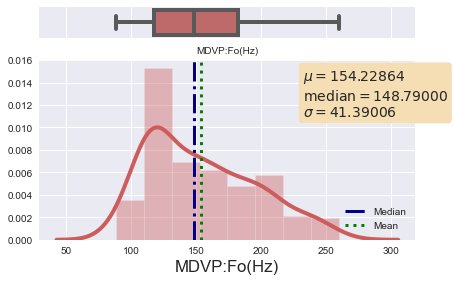

Skewness of MDVP:Fo(Hz) is: 0.587, hence it is right skewed
------------------------------------------------------------------------


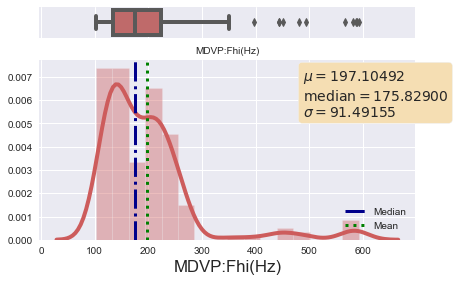

Skewness of MDVP:Fhi(Hz) is: 2.523, hence it is right skewed
------------------------------------------------------------------------


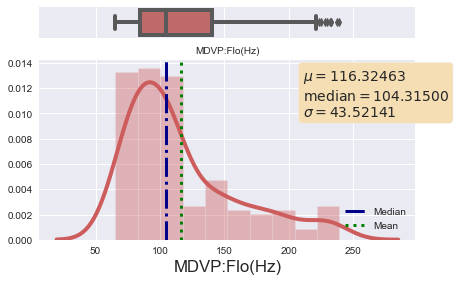

Skewness of MDVP:Flo(Hz) is: 1.208, hence it is right skewed
------------------------------------------------------------------------


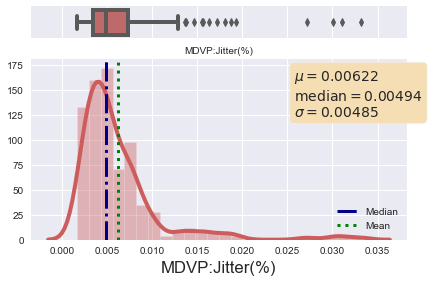

Skewness of MDVP:Jitter(%) is: 3.061, hence it is right skewed
------------------------------------------------------------------------


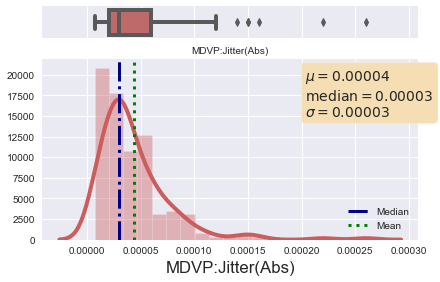

Skewness of MDVP:Jitter(Abs) is: 2.629, hence it is right skewed
------------------------------------------------------------------------


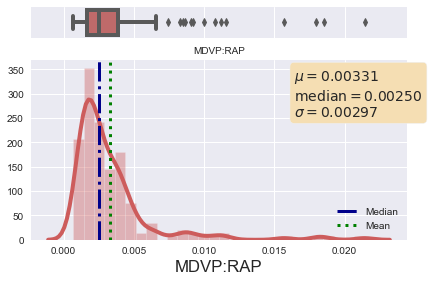

Skewness of MDVP:RAP is: 3.335, hence it is right skewed
------------------------------------------------------------------------


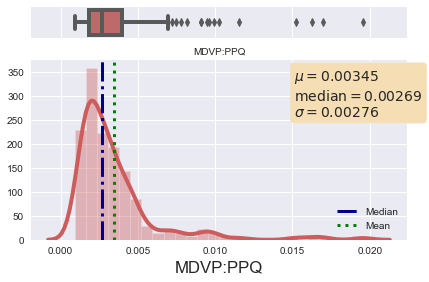

Skewness of MDVP:PPQ is: 3.05, hence it is right skewed
------------------------------------------------------------------------


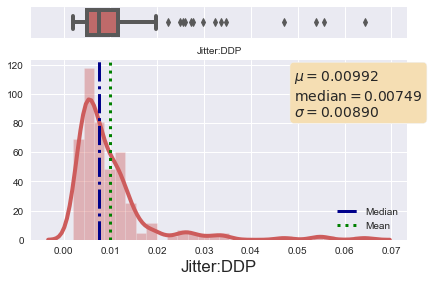

Skewness of Jitter:DDP is: 3.336, hence it is right skewed
------------------------------------------------------------------------


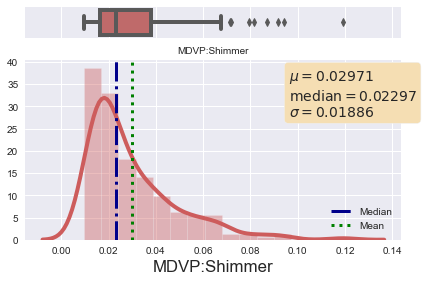

Skewness of MDVP:Shimmer is: 1.654, hence it is right skewed
------------------------------------------------------------------------


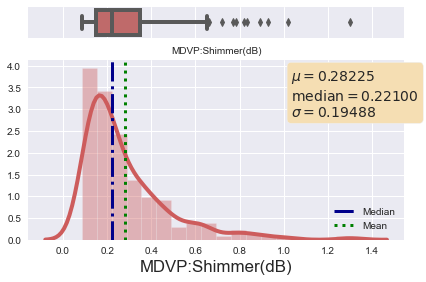

Skewness of MDVP:Shimmer(dB) is: 1.984, hence it is right skewed
------------------------------------------------------------------------


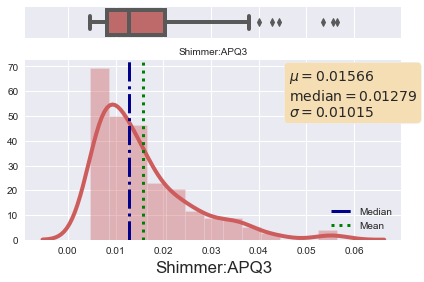

Skewness of Shimmer:APQ3 is: 1.568, hence it is right skewed
------------------------------------------------------------------------


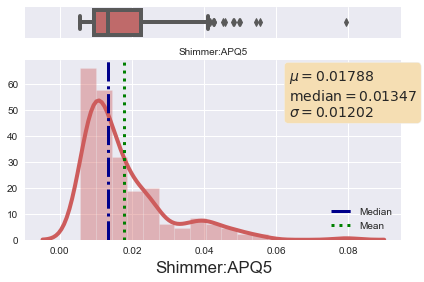

Skewness of Shimmer:APQ5 is: 1.785, hence it is right skewed
------------------------------------------------------------------------


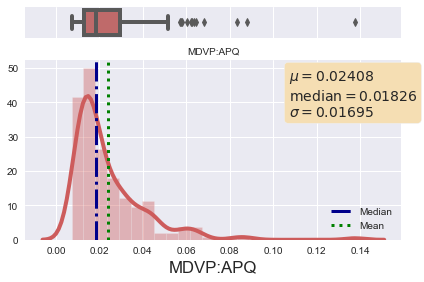

Skewness of MDVP:APQ is: 2.598, hence it is right skewed
------------------------------------------------------------------------


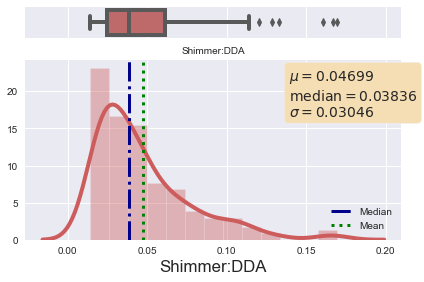

Skewness of Shimmer:DDA is: 1.568, hence it is right skewed
------------------------------------------------------------------------


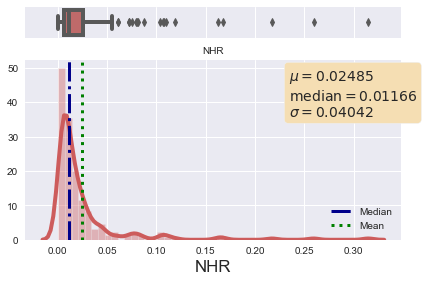

Skewness of NHR is: 4.188, hence it is right skewed
------------------------------------------------------------------------


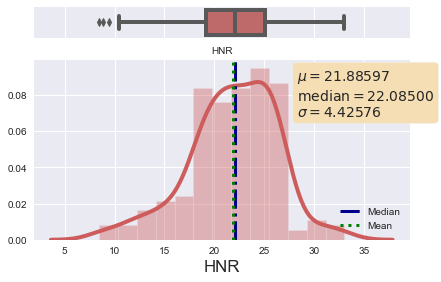

Skewness of HNR is: -0.51, hence it is left skewed
------------------------------------------------------------------------


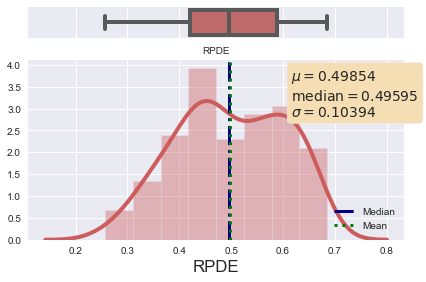

Skewness of RPDE is: -0.142, hence the distribution is fairly normal.
------------------------------------------------------------------------


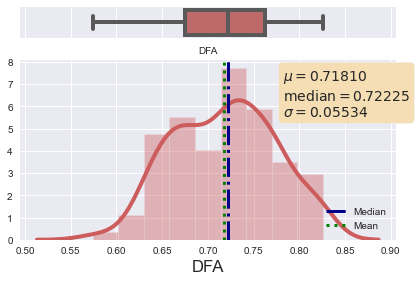

Skewness of DFA is: -0.033, hence the distribution is fairly normal.
------------------------------------------------------------------------


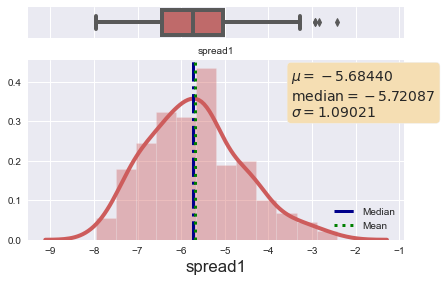

Skewness of spread1 is: 0.429, hence the distribution is fairly normal.
------------------------------------------------------------------------


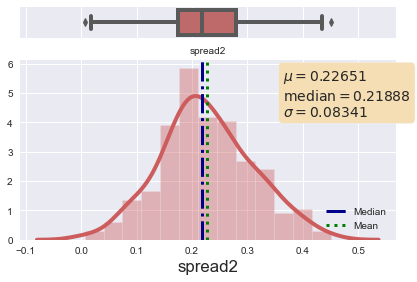

Skewness of spread2 is: 0.143, hence the distribution is fairly normal.
------------------------------------------------------------------------


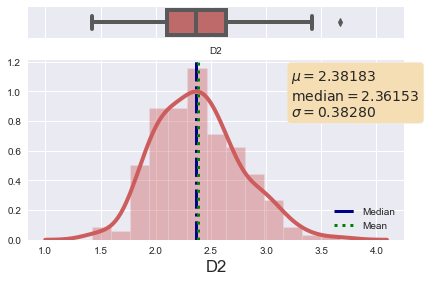

Skewness of D2 is: 0.427, hence the distribution is fairly normal.
------------------------------------------------------------------------


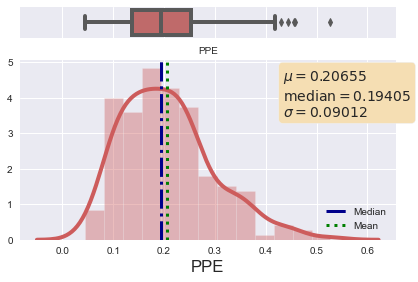

Skewness of PPE is: 0.791, hence it is right skewed
------------------------------------------------------------------------


In [78]:
#loop to plot all numerical attributes
for i, col in enumerate(df.drop("status",axis=1).columns):
    plt.style.use('seaborn-pastel')  
    # create a subplot with 2 windows: one boxplot, one histogram
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(6,4))
    sns.boxplot(df[col], ax=ax_box, color="indianred");
    sns.distplot(df[col], ax=ax_hist, color="indianred");
    
    #vertical lines for median and mode
    plt.axvline(np.median(df[col]),color='darkblue', linestyle='-.',label="Median", lw=3)
    plt.axvline(np.mean(df[col]),color='green',  linestyle=':',label="Mean", lw=3)   
    
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=col)
    plt.legend(loc="lower right")
    plt.title(col,fontdict = {'fontsize' : 10}, loc='center',pad=None)
    
    x=df[col]
    mu = x.mean()
    median = np.median(x)
    sigma = x.std()
    textstr = '\n'.join((r'$\mu=%.5f$' % (mu, ), 
                         r'$\mathrm{median}=%.5f$' % (median, ), 
                         r'$\sigma=%.5f$' % (sigma, )))


    # place a text box in upper left in axes coords
    props = dict(boxstyle='round', facecolor='wheat', alpha=1)
    ax_hist.text(0.70, 0.95, textstr, transform=ax_hist.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    plt.savefig(f'figs/fig{i}.png')
    plt.show();

    #skewness
    skewness = stats.skew(df[col]);
    if(abs(skewness)<0.5):
        print(f"Skewness of {col} is: {round(skewness,3)}, hence the distribution is fairly normal." )
    elif(skewness>0.5):
        print(f"Skewness of {col} is: {round(skewness,3)}, hence it is right skewed" )
    else:
        print(f"Skewness of {col} is: {round(skewness,3)}, hence it is left skewed" )
        
    
    print("------------------------------------------------------------------------")
    
    

### It is evident that most of the attributes are right skewed with a few outliers.
### The attributes like MDVP:Shimmer(dB) and NHR have a lot of outliers. They will be dealt with later, if necessary. 
### Checking correlation of all variables now. 

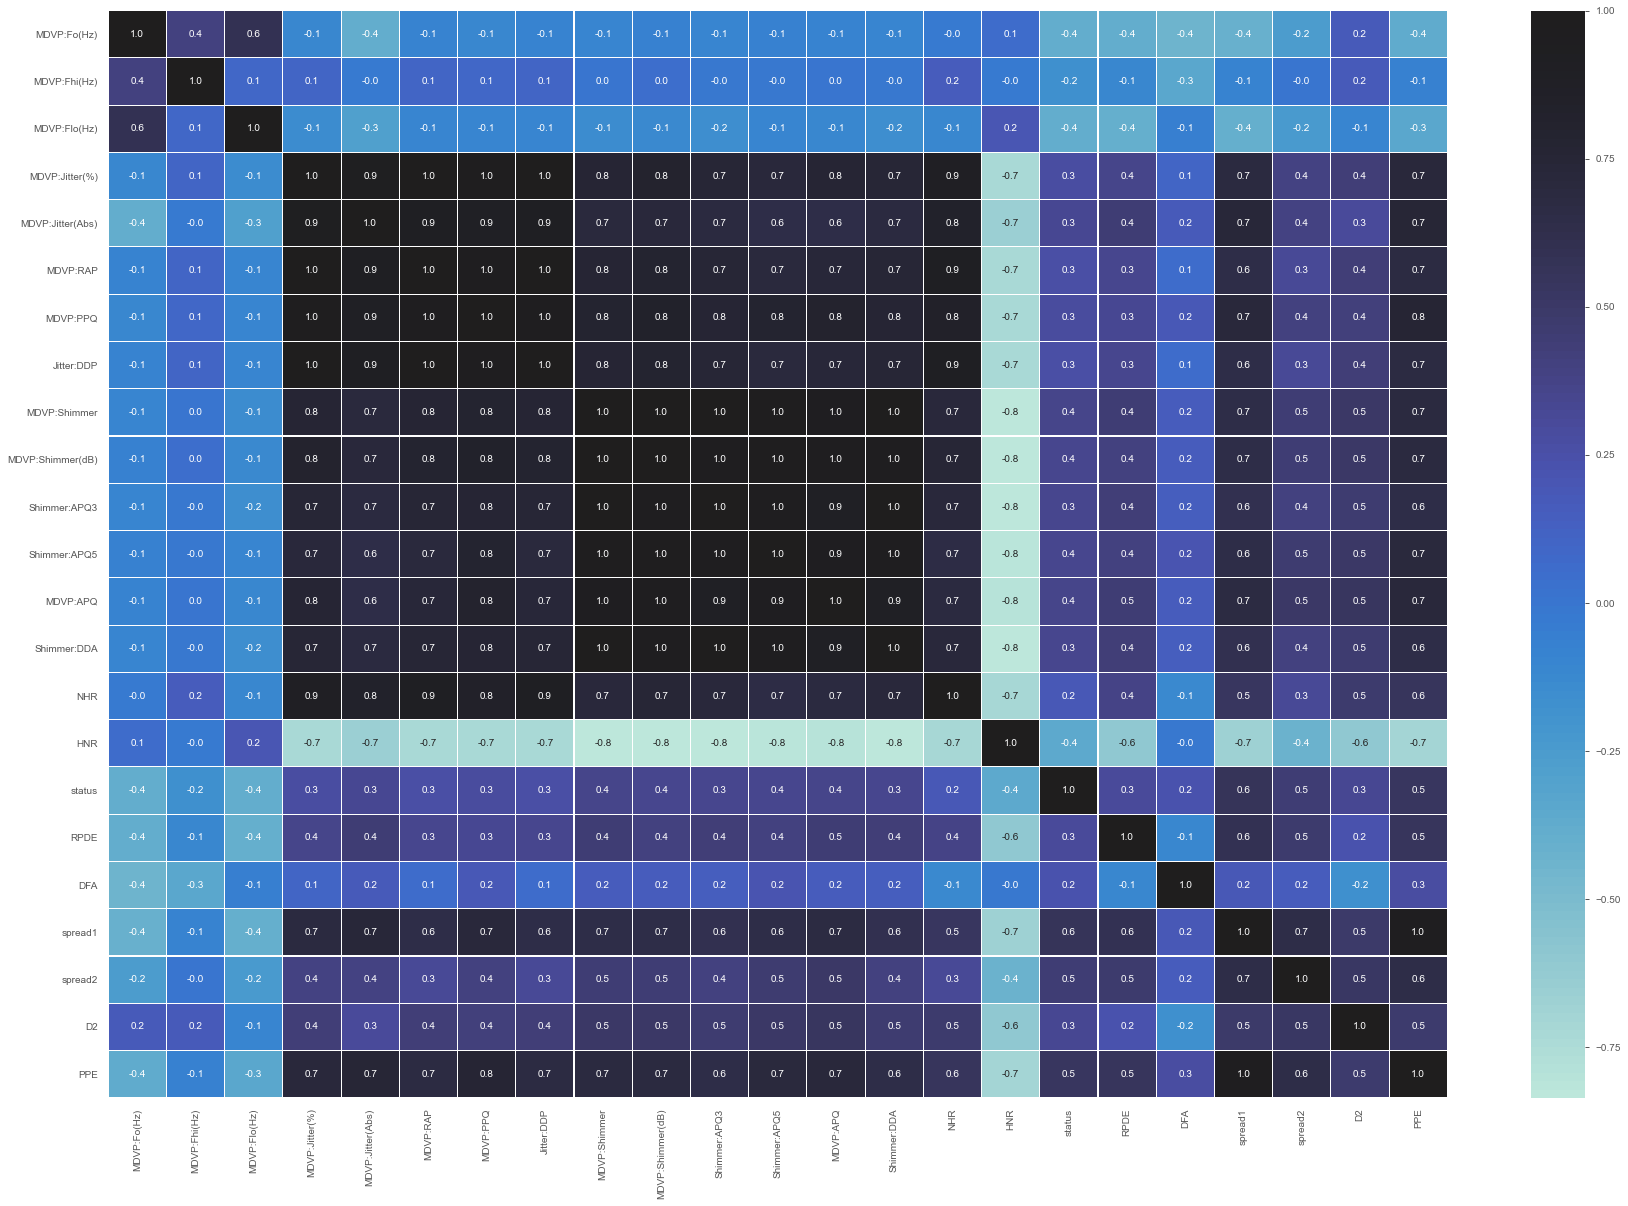

In [16]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

## It's evident that a lot of the independent variables are highly correlated. To check high correlations, we highlight them on the heatmap.

In [17]:
# High correlation visualization
# Absolute values only.
cutoff = 0.9  # only datapoints with correlations higher than or equal to cutoff to be plotted.
hi_corr_df = df.drop('status', axis=1).corr()[abs(df.corr())>=cutoff].round(2)


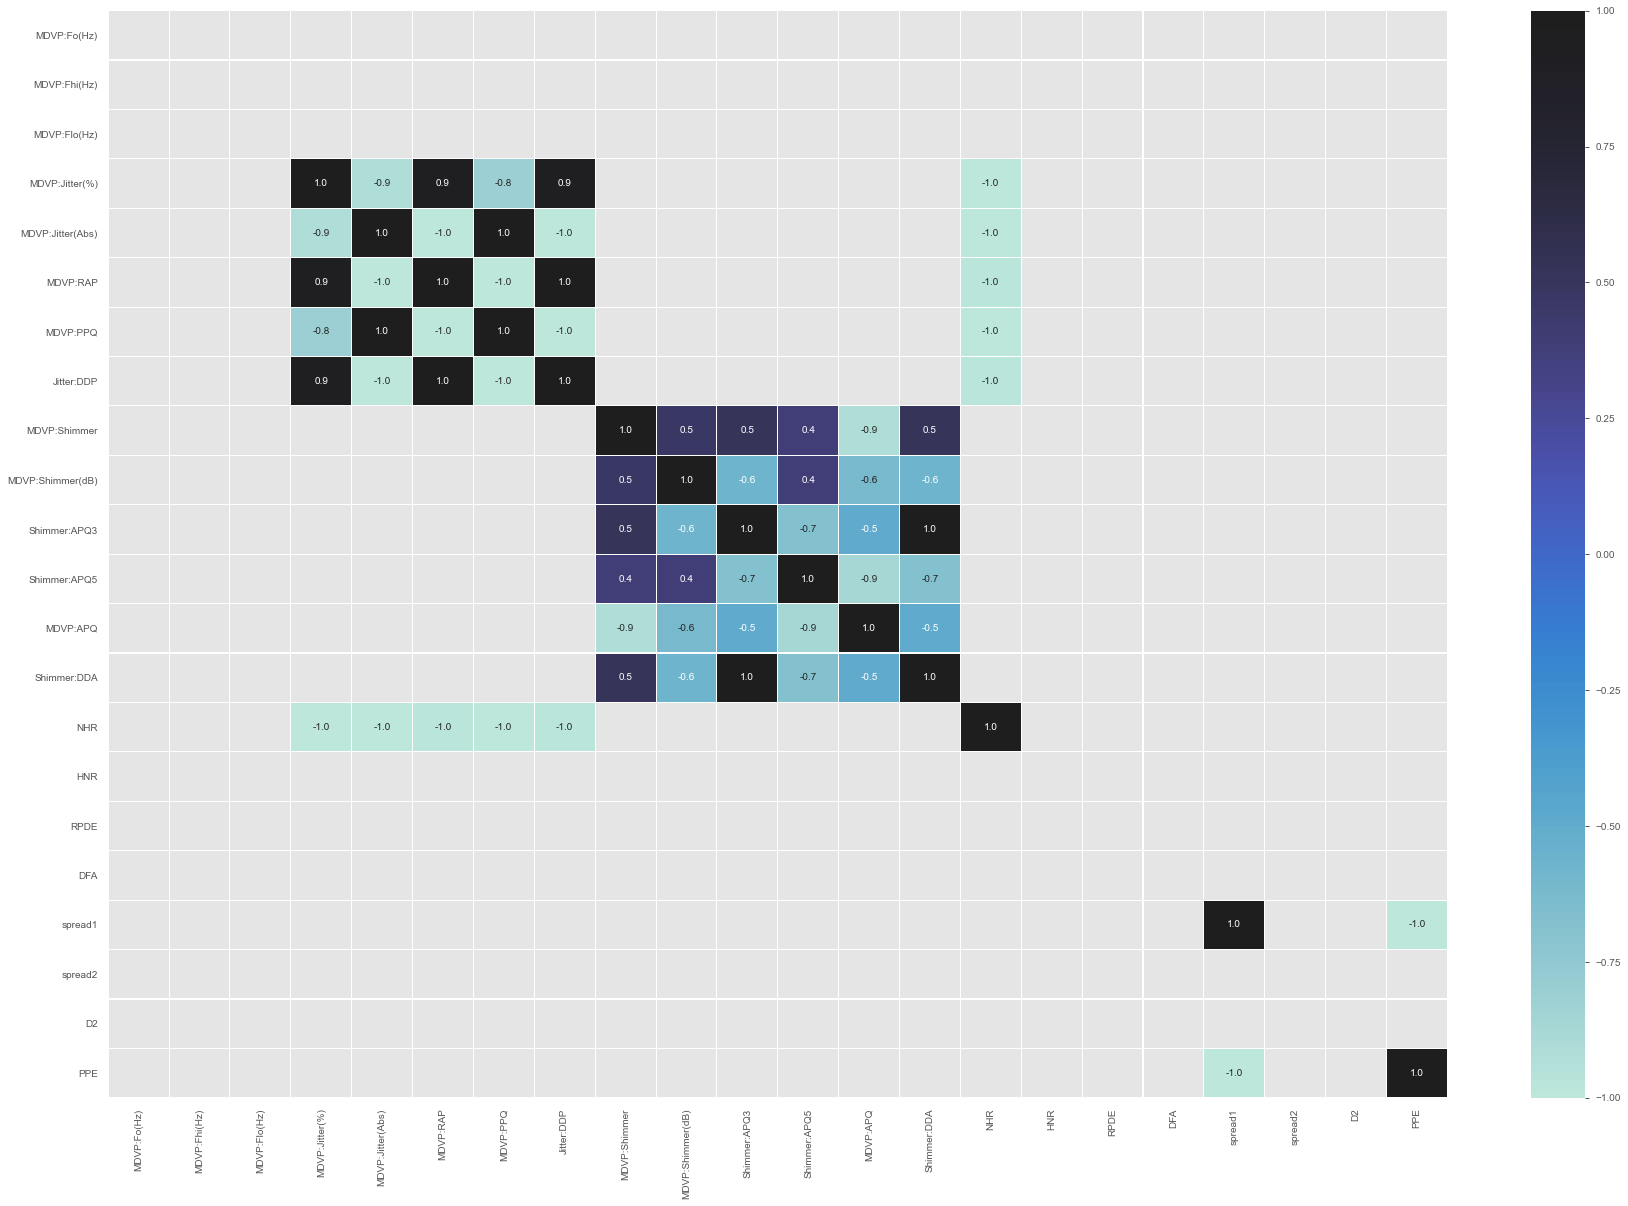

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(hi_corr_df.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

The above highlighted variables have really high correlation (>0.9)

## Bi-variate analysis

<Figure size 576x396 with 0 Axes>

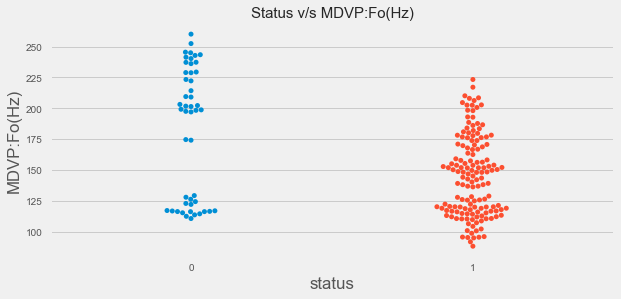

Correlation between Status and MDVP:Fo(Hz) is -0.38
___________________________________________________


<Figure size 576x396 with 0 Axes>

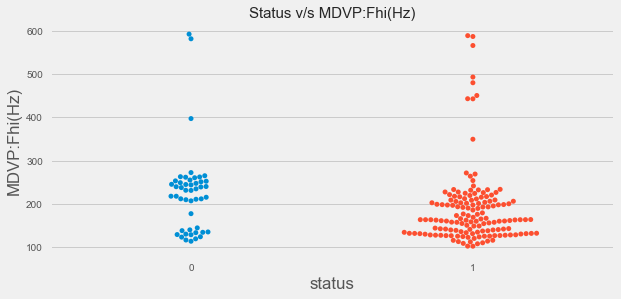

Correlation between Status and MDVP:Fhi(Hz) is -0.17
___________________________________________________


<Figure size 576x396 with 0 Axes>

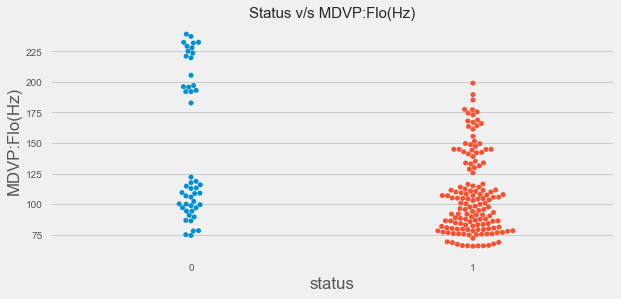

Correlation between Status and MDVP:Flo(Hz) is -0.38
___________________________________________________


<Figure size 576x396 with 0 Axes>

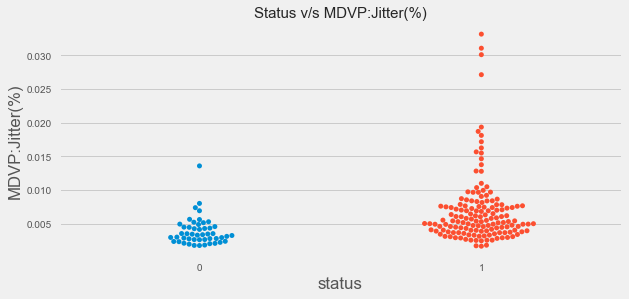

Correlation between Status and MDVP:Jitter(%) is 0.28
___________________________________________________


<Figure size 576x396 with 0 Axes>

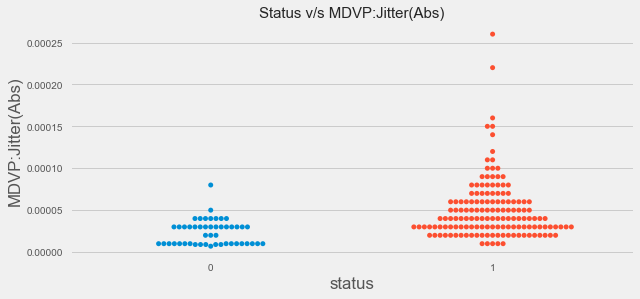

Correlation between Status and MDVP:Jitter(Abs) is 0.34
___________________________________________________


<Figure size 576x396 with 0 Axes>

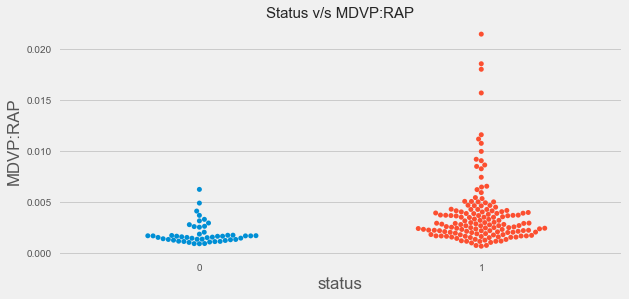

Correlation between Status and MDVP:RAP is 0.27
___________________________________________________


<Figure size 576x396 with 0 Axes>

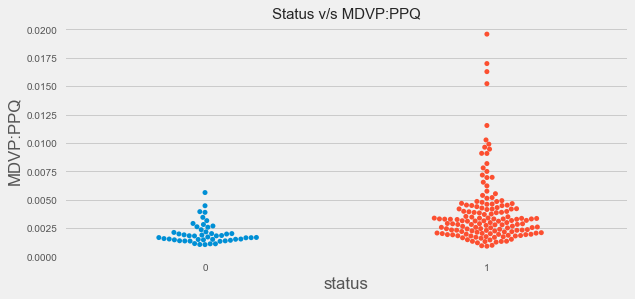

Correlation between Status and MDVP:PPQ is 0.29
___________________________________________________


<Figure size 576x396 with 0 Axes>

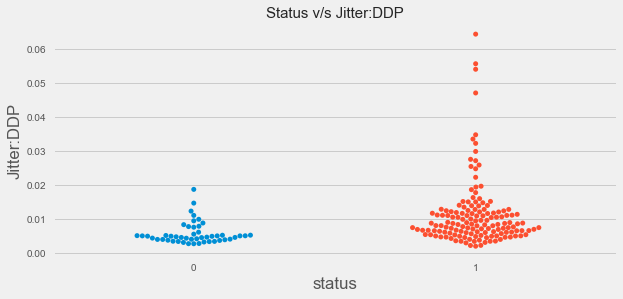

Correlation between Status and Jitter:DDP is 0.27
___________________________________________________


<Figure size 576x396 with 0 Axes>

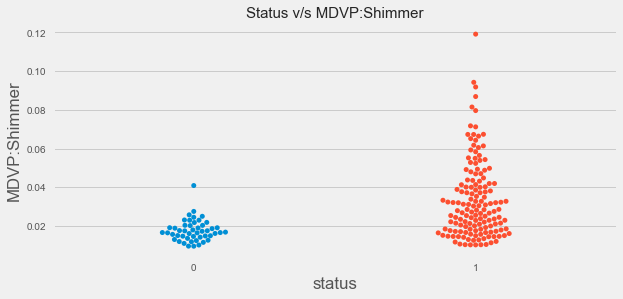

Correlation between Status and MDVP:Shimmer is 0.37
___________________________________________________


<Figure size 576x396 with 0 Axes>

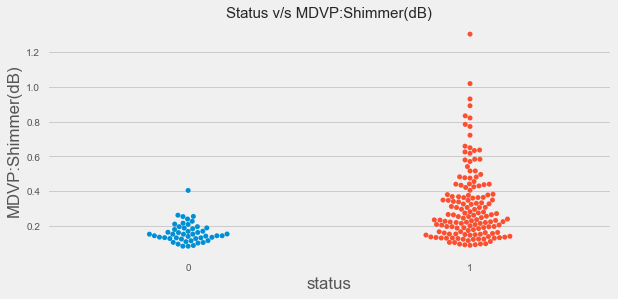

Correlation between Status and MDVP:Shimmer(dB) is 0.35
___________________________________________________


<Figure size 576x396 with 0 Axes>

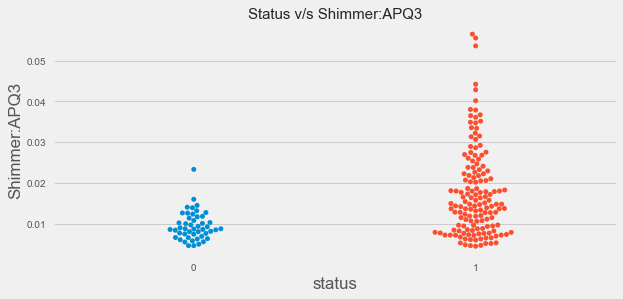

Correlation between Status and Shimmer:APQ3 is 0.35
___________________________________________________


<Figure size 576x396 with 0 Axes>

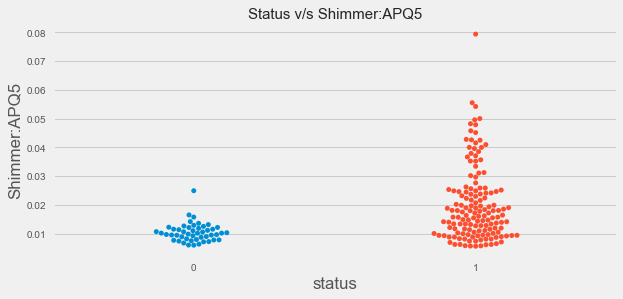

Correlation between Status and Shimmer:APQ5 is 0.35
___________________________________________________


<Figure size 576x396 with 0 Axes>

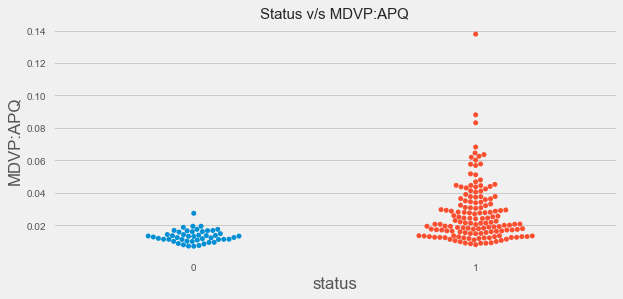

Correlation between Status and MDVP:APQ is 0.36
___________________________________________________


<Figure size 576x396 with 0 Axes>

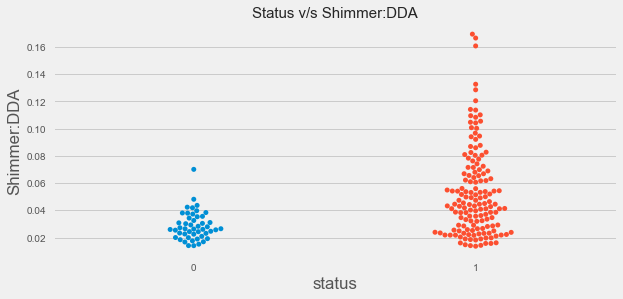

Correlation between Status and Shimmer:DDA is 0.35
___________________________________________________


<Figure size 576x396 with 0 Axes>

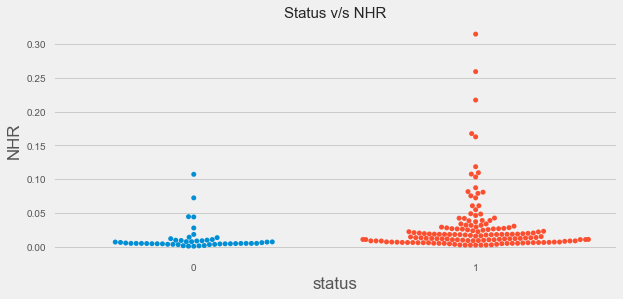

Correlation between Status and NHR is 0.19
___________________________________________________


<Figure size 576x396 with 0 Axes>

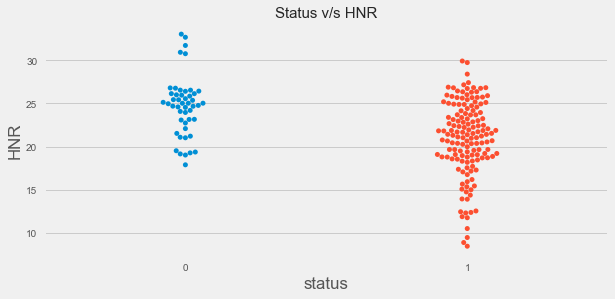

Correlation between Status and HNR is -0.36
___________________________________________________


<Figure size 576x396 with 0 Axes>

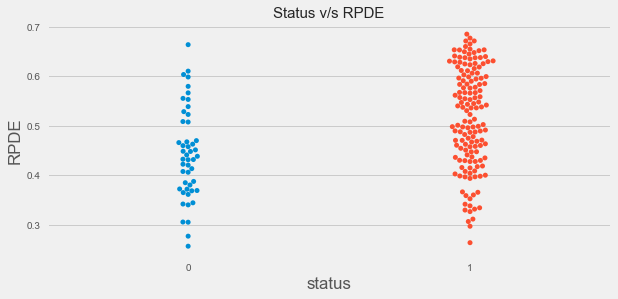

Correlation between Status and RPDE is 0.31
___________________________________________________


<Figure size 576x396 with 0 Axes>

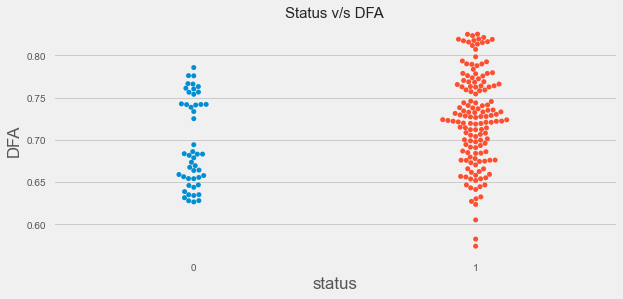

Correlation between Status and DFA is 0.23
___________________________________________________


<Figure size 576x396 with 0 Axes>

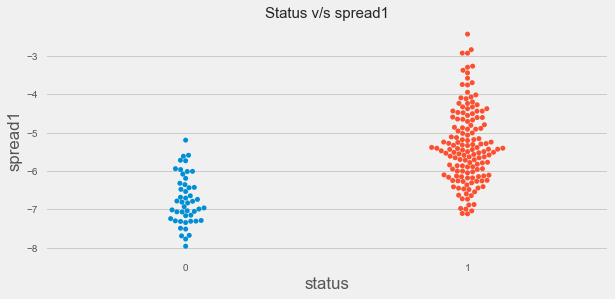

Correlation between Status and spread1 is 0.56
___________________________________________________


<Figure size 576x396 with 0 Axes>

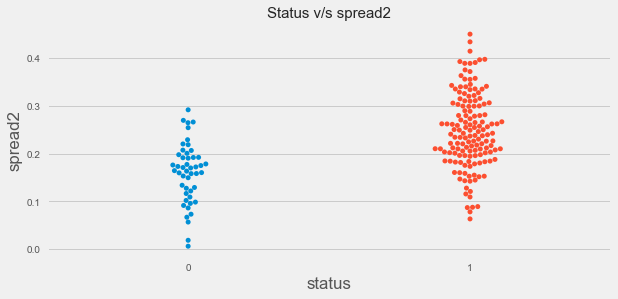

Correlation between Status and spread2 is 0.45
___________________________________________________


<Figure size 576x396 with 0 Axes>

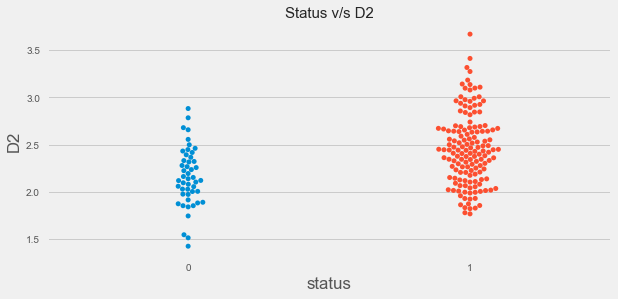

Correlation between Status and D2 is 0.34
___________________________________________________


<Figure size 576x396 with 0 Axes>

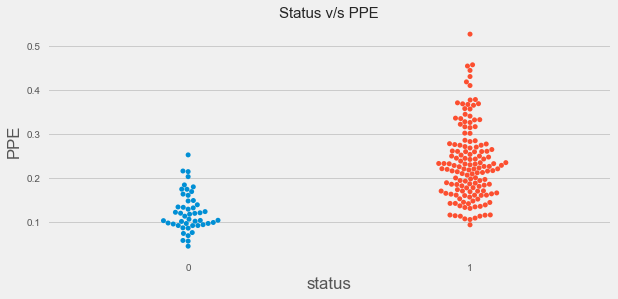

Correlation between Status and PPE is 0.53
___________________________________________________


In [19]:
for i, col in enumerate(df.drop(labels=['status'],axis=1).columns):
    plt.style.use("fivethirtyeight")
    plt.figure(i)
    plt.figure(figsize=(9,4))
    plt.xlabel('status');
    plt.ylabel(col);
    sns.swarmplot(y=col, data=df, x="status")
    corr, _ = pearsonr(df['status'], df[col])
    plt.title(f"Status v/s {col}", fontsize=15)
    plt.savefig(f'biv/biv{i}.png')
    plt.show();
    print(f"Correlation between Status and {col} is {round(corr,2)}")
    print("___________________________________________________")


### There isn't much significant relationship between individual independent variables v/s the target variable. Hence, we will all 22 columns for building our model.

In [20]:
X = df.drop(labels=['status'], axis=1) #dropping target variable
X.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [21]:
y = df["status"] #target variable in y
pd.DataFrame(y).head(2)

,status
0,1
1,1


In [22]:
#splitting in a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# Building Models
# Standard Classification Algorithms: Logistic, NaiveBayes, kNN

# 1. Logistic Regression

In [23]:
#defining LR pipeline
pipeline_lr = Pipeline([
   ('normalization', MinMaxScaler()), 
   ('classifier', LogisticRegression(solver="liblinear"))
])

In [24]:
pipeline_lr.fit(x_train,y_train)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [25]:
#predict on test
y_predict = pipeline_lr.predict(x_test)

y_predict ##our predicted values on test set



array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [26]:
logistic_score_train = pipeline_lr.score(x_train, y_train)
print(f"Train accuracy for logistic regression is {logistic_score_train}")

logistic_score_test = pipeline_lr.score(x_test, y_test)
print(f"Test accuracy for logistic regression is {logistic_score_test}")

Train accuracy for logistic regression is 0.8455882352941176
Test accuracy for logistic regression is 0.9152542372881356


### Confusion Matrix for Logistic Regression

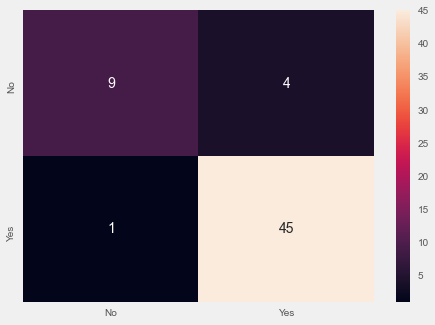

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.style.use("fivethirtyeight")
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [28]:
LR_precision = precision_score(y_test, y_predict)
print(f"Logistic Regression - Precision: {LR_precision}")

LR_recall = recall_score(y_test, y_predict)
print(f"Logistic Regression - Recall: {LR_recall}")

LR_f1 = f1_score(y_test, y_predict)

print(f"Logistic Regression - F1 Score: {LR_f1}")

Logistic Regression - Precision: 0.9183673469387755
Logistic Regression - Recall: 0.9782608695652174
Logistic Regression - F1 Score: 0.9473684210526316


### Classification Report

In [29]:
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95        46
           0       0.90      0.69      0.78        13

    accuracy                           0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59



### ROC curve and area under the curve for logistic regression


In [30]:
LRprob=pipeline_lr.predict_proba(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, LRprob[:, 1])
roc_aucLR = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_aucLR)

Area under the ROC curve : 0.921405


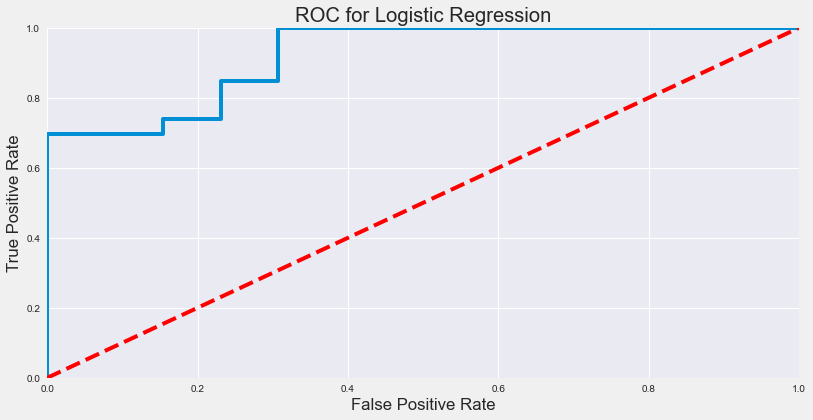

In [31]:
#ROC Curve for logistic regression

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
LR = pd.DataFrame({'Accuracy': [logistic_score_test],
                    'Precision': [LR_precision],
                    'Recall': [LR_recall],
                    'F1 Score': [LR_f1],
                    'AUC':[roc_aucLR]},index=["Logistic Regression"])

In [33]:
LR

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.915254,0.918367,0.978261,0.947368,0.921405


# 2.Naive Bayes

In [34]:
#defining NB pipeline
pipeline_NB = Pipeline([
   ('normalization', MinMaxScaler()), 
   ('classifier', GaussianNB())  #using gaussian naive bayes
])

pipeline_NB.fit(x_train,y_train)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('classifier', GaussianNB())])

In [35]:
#predict on test
y_predict = pipeline_NB.predict(x_test)

y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [36]:
test_score_NB = accuracy_score(y_test, y_predict)

print(f"Test Accuracy for GaussianNB: {test_score_NB}")

Test Accuracy for GaussianNB: 0.6779661016949152


### Confusion Matrix for Naive Bayes

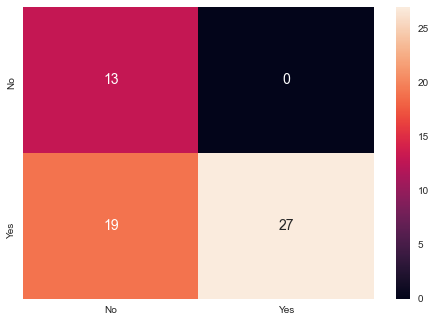

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [38]:
NB_precision = precision_score(y_test, y_predict)
print(f"Naive Bayes - Precision: {NB_precision}")

NB_recall = recall_score(y_test, y_predict)
print(f"Naive Bayes - Recall: {NB_recall}")

NB_f1 = f1_score(y_test, y_predict)

print(f"Naive Bayes - F1 Score: {NB_f1}")

Naive Bayes - Precision: 1.0
Naive Bayes - Recall: 0.5869565217391305
Naive Bayes - F1 Score: 0.7397260273972603


### Classification Report

In [39]:
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       1.00      0.59      0.74        46
           0       0.41      1.00      0.58        13

    accuracy                           0.68        59
   macro avg       0.70      0.79      0.66        59
weighted avg       0.87      0.68      0.70        59



### ROC curve and area under the curve for Naive Bayes (Gaussian)


In [40]:
NBprob=pipeline_NB.predict_proba(x_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, NBprob[:, 1])
roc_aucNB = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_aucNB)

Area under the ROC curve : 0.949833


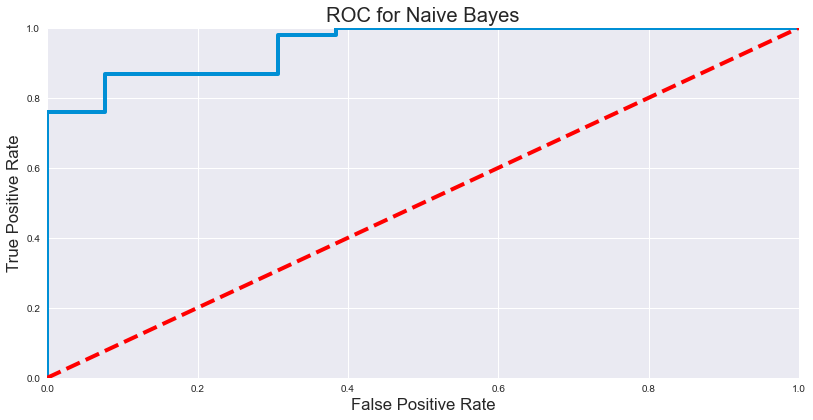

In [41]:
#ROC Curve for NB

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr2,tpr2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
NB = pd.DataFrame({'Accuracy': [test_score_NB],
                    'Precision': [NB_precision],
                    'Recall': [NB_recall],
                    'F1 Score': [NB_f1],
                    'AUC':[roc_aucNB]},index=["Naive Bayes"])

In [43]:
NB

,Accuracy,Precision,Recall,F1 Score,AUC
Naive Bayes,0.677966,1.0,0.586957,0.739726,0.949833


# 3. kNN Classifier

In [44]:
from sklearn.model_selection import GridSearchCV

pipeline_knn = Pipeline([
   ('normalization', MinMaxScaler()), 
   ('classifier', KNeighborsClassifier())
])

#finding optimal value of n

parameteres = {'classifier__n_neighbors':[3,5,7,9,11,13,15,17,19,21]}
grid = GridSearchCV(pipeline_knn, param_grid=parameteres, cv=5)
grid.fit(x_train, y_train)

score = grid.score(x_test,y_test)
print(score)

0.9322033898305084


In [45]:
print(grid.best_params_)


{'classifier__n_neighbors': 3}


In [46]:
#defining knn pipeline with n=3
pipeline_knn = Pipeline([
   ('normalization', MinMaxScaler()), 
   ('classifier', KNeighborsClassifier(n_neighbors=3))
])

pipeline_knn.fit(x_train,y_train)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [47]:
#predict on test
y_pred = pipeline_knn.predict(x_test)
test_score_knn = pipeline_knn.score(x_test, y_test)

# evaluate test accuracy
print(f"Test Score for KNN: {test_score_knn}")

Test Score for KNN: 0.9322033898305084


Accuracy of 93.22% of test set

### Confusion Matrix

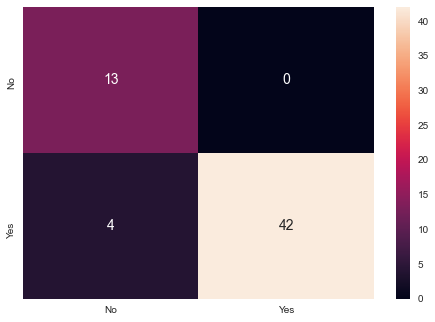

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [49]:
knn_precision = precision_score(y_test, y_pred)
print(f"kNN - Precision: {knn_precision}")

knn_recall = recall_score(y_test, y_pred)
print(f"kNN - Recall: {knn_recall}")

knn_f1 = f1_score(y_test, y_pred)
print(f"kNN - F1 Score: {knn_f1}")

kNN - Precision: 1.0
kNN - Recall: 0.9130434782608695
kNN - F1 Score: 0.9545454545454545


### Classification Report

In [50]:
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        46
           0       0.76      1.00      0.87        13

    accuracy                           0.93        59
   macro avg       0.88      0.96      0.91        59
weighted avg       0.95      0.93      0.94        59



In [51]:
# ROC curve and area under the curve for kNN
knnprob=pipeline_knn.predict_proba(x_test)
fpr3, tpr3, thresholds4 = roc_curve(y_test, knnprob[:, 1])
roc_aucknn = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_aucknn)

Area under the ROC curve : 0.964883


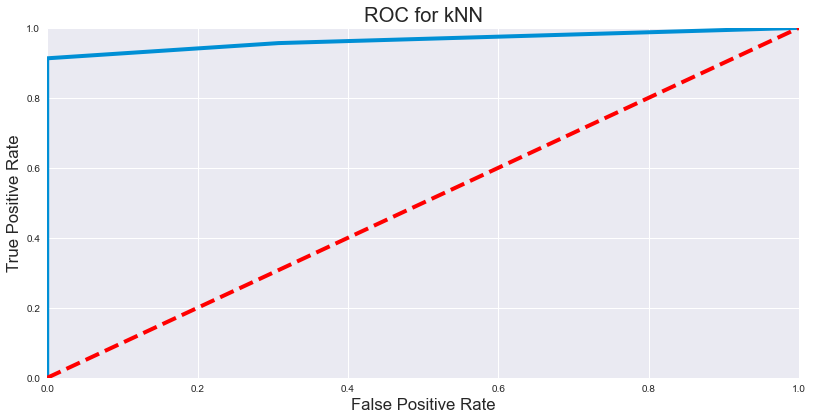

In [52]:
#ROC Curve for kNN

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr3,tpr3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for kNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [53]:
knn = pd.DataFrame({'Accuracy': [test_score_knn],
                    'Precision': [knn_precision],
                    'Recall': [knn_recall],
                    'F1 Score': [knn_f1],
                    'AUC':[roc_aucknn]},index=["kNN"])

In [54]:
knn

,Accuracy,Precision,Recall,F1 Score,AUC
kNN,0.932203,1.0,0.913043,0.954545,0.964883


# Ensemble Models: Random Forest, Bagging Classifier, XGBoost

# 4. Random Forest

In [55]:
#defining RandomForest pipeline
pipeline_rf = Pipeline([
   ('normalization', MinMaxScaler()), 
   ('classifier', RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12))
])

pipeline_rf.fit(x_train,y_train)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(max_features=12, n_estimators=50,
                                        random_state=1))])

In [56]:
y_pred = pipeline_rf.predict(x_test)
test_Score_RF = pipeline_rf.score(x_test, y_test)
print(f"Random Forest Test score: {test_Score_RF}")

Random Forest Test score: 0.9491525423728814


### Confusion Matrix

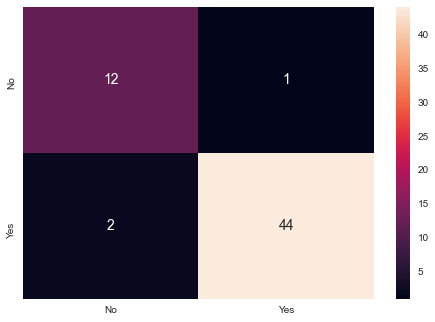

In [57]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [58]:
RF_precision = precision_score(y_test, y_pred)
print(f"Random Forest - Precision: {RF_precision}")

RF_recall = recall_score(y_test, y_pred)
print(f"Random Forest - Recall: {RF_recall}")

RF_f1 = f1_score(y_test, y_pred)
print(f"Random Forest - F1 Score: {RF_f1}")

Random Forest - Precision: 0.9777777777777777
Random Forest - Recall: 0.9565217391304348
Random Forest - F1 Score: 0.967032967032967


### Classification Report

In [59]:
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97        46
           0       0.86      0.92      0.89        13

    accuracy                           0.95        59
   macro avg       0.92      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



In [60]:
# ROC curve and area under the curve for RandomForest
RFprob=pipeline_rf.predict_proba(x_test)
fpr4, tpr4, thresholds4 = roc_curve(y_test, RFprob[:, 1])
roc_aucRF = auc(fpr4, tpr4)
print("Area under the ROC curve : %f" % roc_aucRF)

Area under the ROC curve : 0.988294


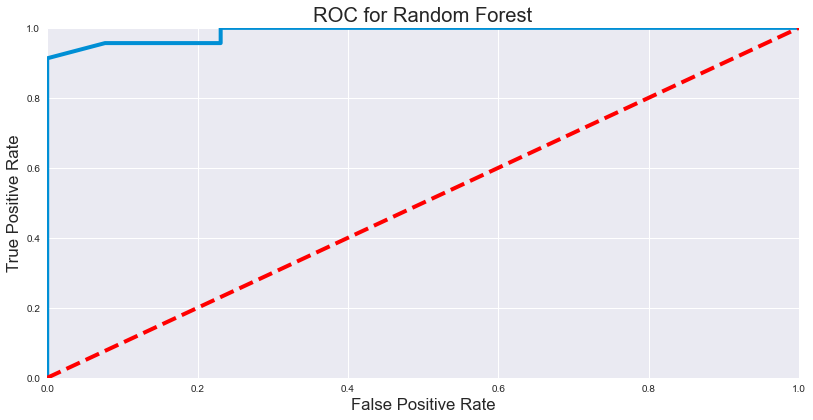

In [61]:
#ROC Curve for RandomForest

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr4,tpr4)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [62]:
RF = pd.DataFrame({'Accuracy': [test_Score_RF],
                    'Precision': [RF_precision],
                    'Recall': [RF_recall],
                    'F1 Score': [RF_f1],
                    'AUC':[roc_aucRF]},index=["Random Forest"])

In [63]:
RF

,Accuracy,Precision,Recall,F1 Score,AUC
Random Forest,0.949153,0.977778,0.956522,0.967033,0.988294


# 5. Bagging Classifier

In [64]:
#defining Bagging pipeline
pipeline_bc = Pipeline([
   ('normalization', MinMaxScaler()), 
   ('classifier', BaggingClassifier(n_estimators=50,random_state=1))
])

pipeline_bc.fit(x_train,y_train)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('classifier',
                 BaggingClassifier(n_estimators=50, random_state=1))])

In [65]:
y_pred = pipeline_bc.predict(x_test)
BC_test_score = bgcl.score(x_test , y_test)
print(f"The score on test data for Bagging is {BC_test_score}")

NameError: name 'bgcl' is not defined

### Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [ ]:
BC_precision = precision_score(y_test, y_pred)
print(f"Bagging Classifier - Precision: {BC_precision}")

BC_recall = recall_score(y_test, y_pred)
print(f"Bagging Classifier - Recall: {BC_recall}")

BC_f1 = f1_score(y_test, y_pred)
print(f"Bagging Classifier - F1 Score: {BC_f1}")

### Classification Report

In [ ]:
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))

In [ ]:
# ROC curve and area under the curve for BaggingClassifier
baggingcl=pipeline_bc.predict_proba(x_test)
fpr5, tpr5, thresholds5 = roc_curve(y_test, baggingcl[:, 1])
roc_aucBC = auc(fpr5, tpr5)
print("Area under the ROC curve : %f" % roc_aucBC)

In [ ]:
#ROC Curve for BaggingClassifier

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr5,tpr5)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
BC = pd.DataFrame({'Accuracy': [BC_test_score],
                    'Precision': [BC_precision],
                    'Recall': [BC_recall],
                    'F1 Score': [BC_f1],
                    'AUC':[roc_aucBC]},index=["Bagging Classifier"])

In [ ]:
BC

# 6. XGBoost

In [ ]:
#define pipeline for XGBoost

pipeline_xgb = Pipeline([
   ('normalization', MinMaxScaler()), 
   ('classifier', XGBClassifier())
])

pipeline_xgb.fit(x_train,y_train)

In [ ]:
y_pred = pipeline_xgb.predict(x_test)
y_pred

In [ ]:
xgboost_score_test = pipeline_xgb.score(x_test, y_test)
print(f"Test score for xgboost is {xgboost_score_test}")

In [ ]:
print(classification_report(y_test, y_pred))

### Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [ ]:
xgb_precision = precision_score(y_test, y_pred)
print(f"XGBoost - Precision: {xgb_precision}")

xgb_recall = recall_score(y_test, y_pred)
print(f"XGBoost - Recall: {xgb_recall}")

xgb_f1 = f1_score(y_test, y_pred)
print(f"XGBoost - F1 Score: {xgb_f1}")

### Classification Report

In [ ]:
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))

In [ ]:
# ROC curve and area under the curve for XGBoost
xgboostProb=pipeline_xgb.predict_proba(x_test)
fpr6, tpr6, thresholds6 = roc_curve(y_test, xgboostProb[:, 1])
roc_aucxgb = auc(fpr6, tpr6)
print("Area under the ROC curve : %f" % roc_aucxgb)

In [ ]:
#ROC Curve for XGBoost

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr6,tpr6)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
xgb = pd.DataFrame({'Accuracy': [xgboost_score_test],
                    'Precision': [xgb_precision],
                    'Recall': [xgb_recall],
                    'F1 Score': [xgb_f1],
                    'AUC':[roc_aucxgb]},index=["XGBoost"])

In [ ]:
xgb

# Meta-Classifier

# 7. Stacking 

In [ ]:
from mlxtend.classifier import StackingClassifier

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = LogisticRegression() # RandomForestClassifier(random_state=1)
clf3 = BernoulliNB()
clf4 = RandomForestClassifier(random_state=1)

In [ ]:
rf = RandomForestClassifier(random_state=1)

In [ ]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier = rf)

In [ ]:
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], ['KNN', 'LR', 'Naive Bayes', 'RF',
                                                 'StackingClassifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=15, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

In [ ]:
sclf.fit(x_train,y_train)

In [ ]:
y_pred = sclf.predict(x_test)
y_pred

In [ ]:
sclf_score_test = sclf.score(x_test,y_test)
print(f"Test score for stacking classifier is {sclf_score_test}")

In [ ]:
print(classification_report(y_test, y_pred))

### Confusion Matrix

In [ ]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [ ]:
sclf_precision = precision_score(y_test, y_pred)
print(f"Stacking Classifier - Precision: {sclf_precision}")

sclf_recall = recall_score(y_test, y_pred)
print(f"Stacking Classifier - Recall: {sclf_recall}")

sclf_f1 = f1_score(y_test, y_pred)
print(f"Stacking Classifier - F1 Score: {sclf_f1}")

### Classification Report

In [ ]:
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))

In [ ]:
# ROC curve and area under the curve for StackingClassifier
stackProb=sclf.predict_proba(x_test)
fpr7, tpr7, thresholds7 = roc_curve(y_test, stackProb[:, 1])
roc_aucsc = auc(fpr7, tpr7)
print("Area under the ROC curve : %f" % roc_aucsc)

In [ ]:
#ROC Curve for StackingClassifier

plt.figure(figsize = (12,6))
plt.style.use('seaborn-darkgrid')
plt.plot(fpr7,tpr7)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC for Stacking Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
sc = pd.DataFrame({'Accuracy': [sclf_score_test],
                    'Precision': [sclf_precision],
                    'Recall': [sclf_recall],
                    'F1 Score': [sclf_f1],
                    'AUC':[roc_aucsc]},index=["Stacking Classifier"])

In [ ]:
sc

In [ ]:
models = [LR, NB, knn, RF, BC, xgb, sc]
model = pd.concat(models)

In [ ]:
model_names = ['Logistic', 'NaiveBayes', 'kNN', 'RandomForest' , 'BaggingClassifier', 'XGBoost', 'StackingClassifier']

## Comparing models

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(fpr1, tpr1, label='Logistic (area = %0.2f)' % roc_aucLR)
plt.plot(fpr3, tpr3, label='kNN (area = %0.2f)' % roc_aucknn)
plt.plot(fpr4, tpr4, label='Random Forest (area = %0.2f)' % roc_aucRF)
plt.plot(fpr5, tpr5, label='Bagging Classifier (area = %0.2f)' % roc_aucBC)
plt.plot(fpr6, tpr6, label='XGBoost (area = %0.2f)' % roc_aucxgb)
plt.plot(fpr7, tpr7, label='Stacking Classifier (area = %0.2f)' % roc_aucsc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model

## It is evident that XGBoost has the highest accuracy and the maximum F1 Score. The plot to visualize the following data: 

In [ ]:
#plot to view above metrics

plt.figure(figsize= (17,15))
plt.style.use("ggplot")


plt.subplot(3,2,1)
plt.barh(model_names,model['Accuracy'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('Accuracy Comparision')

plt.subplot(3,2,2)
plt.barh(model_names,model['Precision'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('Precision Comparision')

plt.subplot(3,2,3)
plt.barh(model_names,model['Recall'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('Recall Comparision')

plt.subplot(3,2,4)
plt.barh(model_names,model['F1 Score'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('F1 Score Comparision')

plt.subplot(3,2,5)
plt.barh(model_names,model['AUC'], edgecolor = 'black', alpha = 0.7)
plt.xlabel('ROC-AUC Comparision')


plt.show()

### XGBoost has the highest accuracy and F1 score followed by Bagging Classifier and Random Forest. 

# So for this problem, XGBoost is the perfect classification algorithm.

### Exporting XGboost as a model

In [ ]:
import pickle

with open('xgb-model.pkl', 'wb') as model_file:
  pickle.dump(pipeline_xgb, model_file)